In [119]:
# ===============================
# import libraries
# ===============================
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score


In [120]:
# ===============================
# loading NVIDIA stock data
# ===============================
ticker = yf.Ticker("NVDA")
data = ticker.history(period="1y")  # loading last 1 year of data

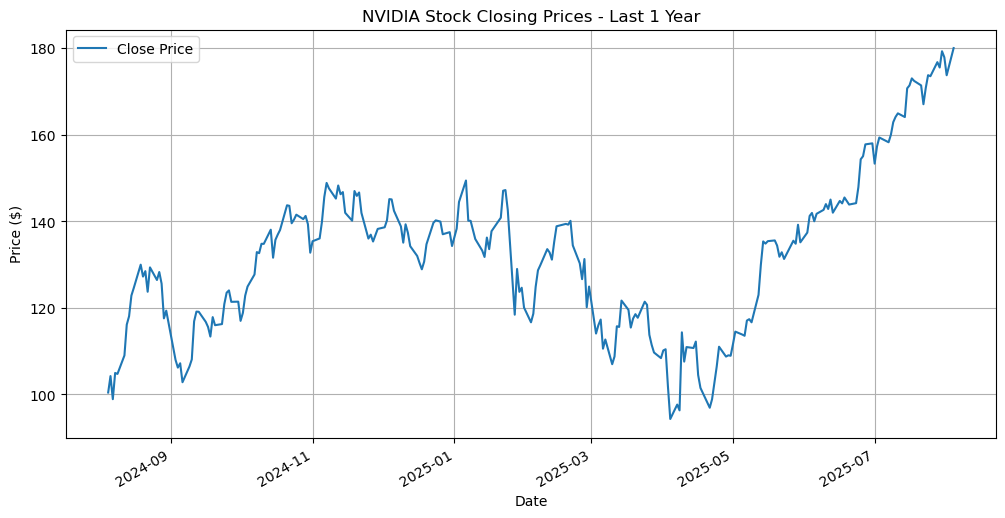

In [121]:
# ===============================
# Plotting closing price
# ===============================
plt.figure(figsize=(12, 6))
data['Close'].plot(title='NVIDIA Stock Closing Prices - Last 1 Year')
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.grid(True)
plt.legend(['Close Price'])
plt.show()

In [122]:
# ===============================
# cleaning the data and feature engineering
# ===============================
print("Missing values before cleaning:\n", data.isnull().sum())
data.dropna(inplace=True)

# feature engineering
data['Daily Return'] = data['Close'].pct_change()
data['MA7'] = data['Close'].rolling(window=7).mean()
data['MA21'] = data['Close'].rolling(window=21).mean()
data['price_diff'] = data['Close'] - data['Open']
data['close_to_open'] = data['Close'] / data['Open']
data['volume_change'] = data['Volume'].pct_change()

# Remove rows with NaN values after feature engineering
data.dropna(inplace=True)


Missing values before cleaning:
 Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


In [123]:
# ===============================
# preparing features and target variable for the model
# ===============================
data['target'] = data['Close'].shift(-1)  #next day's closing price as target
data.dropna(inplace=True)

features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Daily Return',
            'MA7', 'MA21', 'price_diff', 'close_to_open', 'volume_change']

X = data[features]
y = data['target']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print(X.head())
print(y.head())


Shape of X: (229, 11)
Shape of y: (229,)
                                 Open        High  ...  close_to_open  volume_change
Date                                               ...                              
2024-09-03 00:00:00-04:00  115.973361  116.173295  ...       0.930954       0.429671
2024-09-04 00:00:00-04:00  105.376717  113.234228  ...       1.007589      -0.219394
2024-09-05 00:00:00-04:00  104.956840  109.615372  ...       1.021145      -0.176174
2024-09-06 00:00:00-04:00  108.005877  108.115843  ...       0.951777       0.348011
2024-09-09 00:00:00-04:00  104.846884  106.516363  ...       1.015160      -0.337798

[5 rows x 11 columns]
Date
2024-09-03 00:00:00-04:00    106.176460
2024-09-04 00:00:00-04:00    107.176140
2024-09-05 00:00:00-04:00    102.797523
2024-09-06 00:00:00-04:00    106.436386
2024-09-09 00:00:00-04:00    108.065857
Name: target, dtype: float64


In [124]:
# ===============================
# train-test split
# ===============================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

# ===============================
# linear regression model
# ===============================
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [125]:
# ===============================
# predicting and evaluating the model
# ===============================
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"📏 Linear Regression MAE: {mae}")
print(f"📏 Linear Regressio RMSE: {rmse}")

📏 Linear Regression MAE: 3.1440101099998174
📏 Linear Regressio RMSE: 4.065382499038737


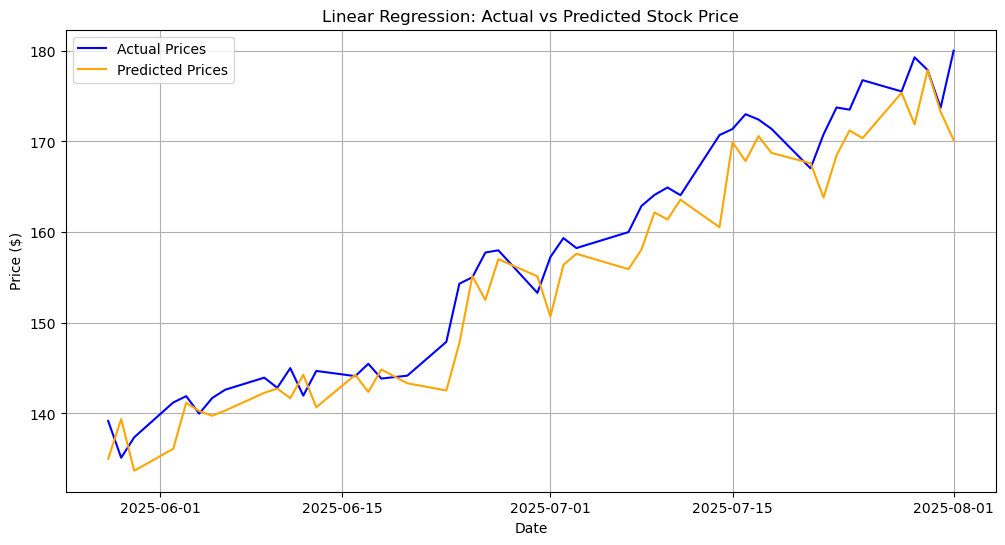

In [126]:
# ===============================
# Visualization: Linear Regression - actual vs predicted
# ===============================
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Prices', color='orange')
plt.title('Linear Regression: Actual vs Predicted Stock Price')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

In [127]:
# ===============================
# Random Forest Regressor model
# ===============================
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

print(f"📏 Random Forest MAE: {rf_mae}")
print(f"📏 Random Forest RMSE: {rf_rmse}")

📏 Random Forest MAE: 15.637042503356934
📏 Random Forest RMSE: 19.73921477337712


In [128]:
# ===============================
# XGBoost Regressor model
# ===============================
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train) 

xgb_pred = xgb_model.predict(X_test)

xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))    

print(f"📏 XGBoost MAE: {xgb_mae}")
print(f"📏 XGBoost RMSE: {xgb_rmse}")

📏 XGBoost MAE: 18.436167509659477
📏 XGBoost RMSE: 23.280517950160146


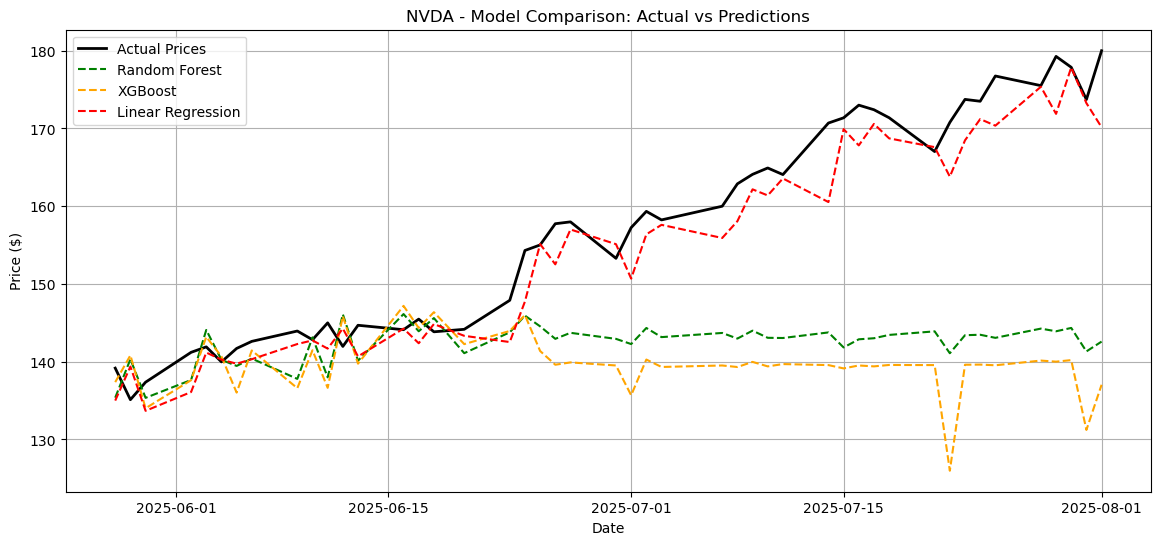

In [129]:
plt.figure(figsize=(14, 6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='black', linewidth=2)
plt.plot(y_test.index, rf_pred, label='Random Forest', color='green', linestyle='--')
plt.plot(y_test.index, xgb_pred, label='XGBoost', color='orange', linestyle='--')
plt.plot(y_test.index, y_pred, label='Linear Regression', color='red', linestyle='--')
plt.title('NVDA - Model Comparison: Actual vs Predictions')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

In [130]:
print("R² Score (Linear):", r2_score(y_test, y_pred))
print("R² Score (RF):", r2_score(y_test, rf_pred))
print("R² Score (XGB):", r2_score(y_test, xgb_pred))

R² Score (Linear): 0.9120493203569642
R² Score (RF): -1.0734621797992445
R² Score (XGB): -1.8841752788939519
